In [1]:
# 구글 마운트 후
# 파일위치 지정
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


### 다양한 조합으로 학습시켜 성능 확인하기
- 활성화 함수
- 최적화 함수
### 모델링 작업에 도움이 되는 callback 함수를 사용해보자
- 모델 저장
- 조기학습 중단

### 활성화 함수, 최적화 함수 조합에 따른 성능비교
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + adam 조합

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 데이터 로딩 -> 손글씨 데이터
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape ,X_test.shape, y_test.shape)
print(np.unique(y_train))  # 10개 feature
print(X_train[0].shape)    # 가로세로 28픽셀 2차원 데이터

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[0 1 2 3 4 5 6 7 8 9]
(28, 28)


In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 최적화 함수 클래스 불러와서 사용

In [29]:
# 1. sigmoid + SGD 조합 -> model1
# 신경망 모델 설계(64,128,256,128,64)
model = Sequential()
model.add(InputLayer(shape=(28,28)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

# 학습방법 및 평가방법 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# 학습 (학습횟수 20번, 검증데이터 20%)
model.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

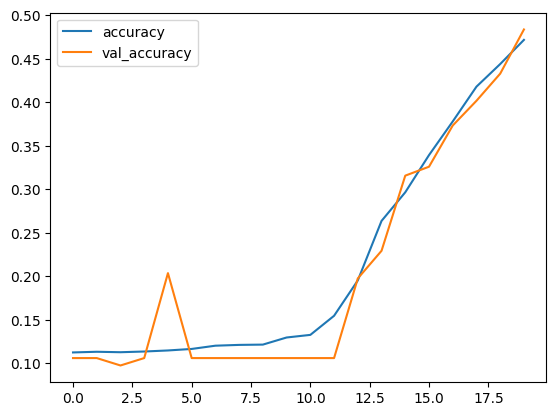

In [30]:
# 학습결과 시각화 (model1, model2, model2)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [21]:
# print(model.evaluate(X_test, y_test))
# 313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4968 - loss: 1.3544
# [1.3258453607559204, 0.5160999894142151]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4968 - loss: 1.3544
[1.3258453607559204, 0.5160999894142151]


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6875 - loss: 1.4893 - val_accuracy: 0.8717 - val_loss: 0.4278
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8984 - loss: 0.3384 - val_accuracy: 0.9165 - val_loss: 0.2839
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9222 - loss: 0.2541 - val_accuracy: 0.9244 - val_loss: 0.2576
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9371 - loss: 0.2064 - val_accuracy: 0.9328 - val_loss: 0.2311
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9456 - loss: 0.1758 - val_accuracy: 0.9361 - val_loss: 0.2215
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9530 - loss: 0.1511 - val_accuracy: 0.9441 - val_loss: 0.2079
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9586 - loss: 0.1352 - val_accuracy: 0.9436 - val_loss: 0.2052
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9637 - loss: 0.1162

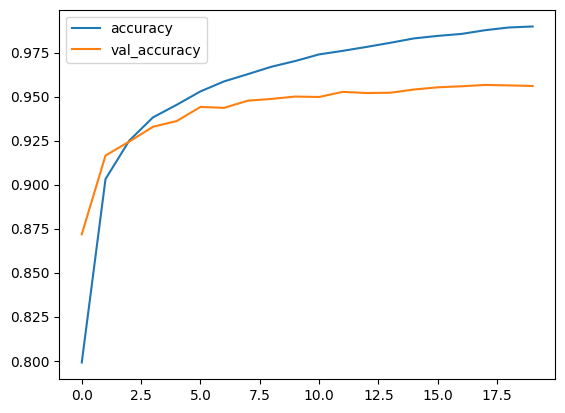

In [37]:
# 2. relu + SGD
model2 = Sequential()
model2.add(InputLayer(shape=(28,28)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))

model2.add(Dense(10, activation='softmax'))

# 학습방법 및 평가방법 설정
model2.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])
# SGD 기본학습률: 0.01 -> relu 활성화 함수 사용 -> 오차가 큰 값이 전달됨 -> 학습X -> 학습률 줄이기
# 학습 (학습횟수 20번, 검증데이터 20%)
model2.fit(X_train, y_train, validation_split=0.2, epochs=20)

# 학습결과 시각화 (model1, model2, model2)
plt.plot(model2.history.history['accuracy'], label='accuracy')
plt.plot(model2.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
# print(model2.evaluate(X_test, y_test))
# 313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9425 - loss: 0.2215
# [0.19909793138504028, 0.9487000107765198]

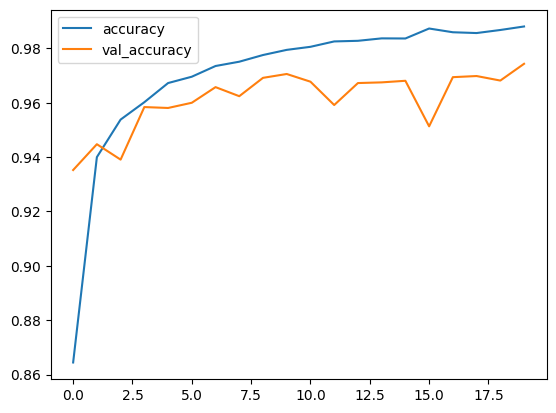

In [32]:
# 3. relu + adam
model3 = Sequential()
model3.add(InputLayer(shape=(28,28)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dense(10, activation='softmax'))

# 학습방법 및 평가방법 설정
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # adam: 기본학습률 0.001 별로 크지 않음
# 학습 (학습횟수 20번, 검증데이터 20%)
model3.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

# 학습결과 시각화 (model1, model2, model2)
plt.plot(model3.history.history['accuracy'], label='accuracy')
plt.plot(model3.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
# print(model3.evaluate(X_test, y_test))
# 313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9676 - loss: 0.1891
# [0.1657239943742752, 0.9715999960899353]

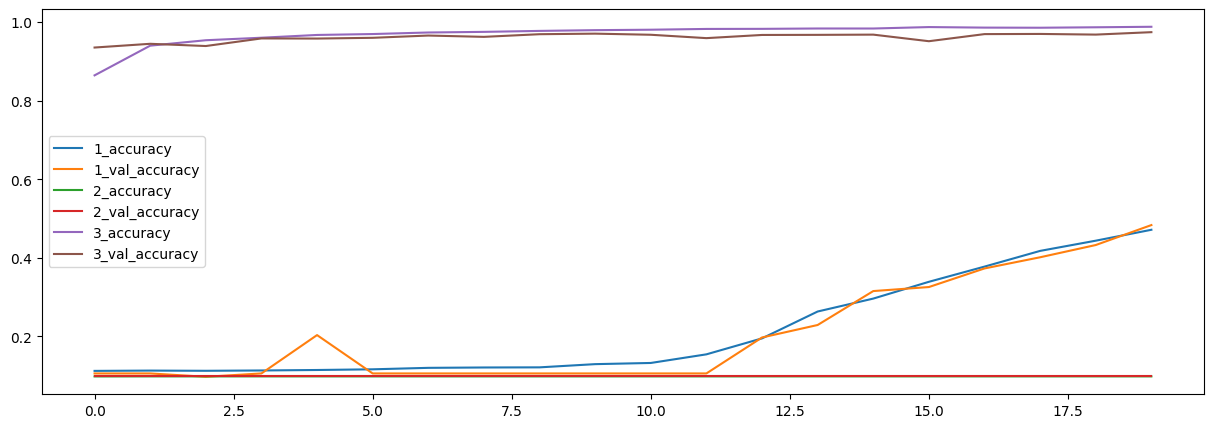

In [35]:
plt.figure(figsize=(15,5))
plt.plot(model.history.history['accuracy'], label='1_accuracy')
plt.plot(model.history.history['val_accuracy'], label='1_val_accuracy')
plt.plot(model2.history.history['accuracy'], label='2_accuracy')
plt.plot(model2.history.history['val_accuracy'], label='2_val_accuracy')
plt.plot(model3.history.history['accuracy'], label='3_accuracy')
plt.plot(model3.history.history['val_accuracy'], label='3_val_accuracy')
plt.legend()
plt.show()

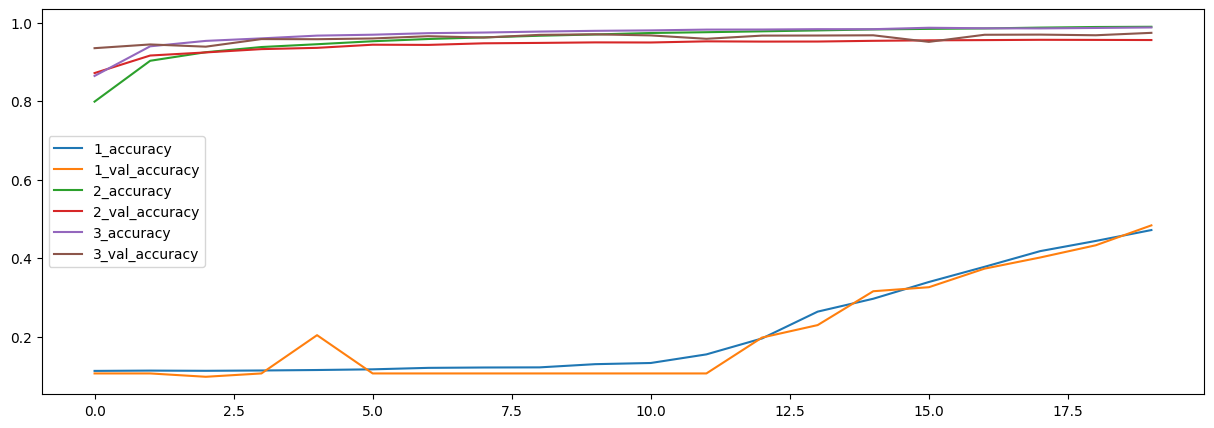

In [38]:
plt.figure(figsize=(15,5))
plt.plot(model.history.history['accuracy'], label='1_accuracy')
plt.plot(model.history.history['val_accuracy'], label='1_val_accuracy')
plt.plot(model2.history.history['accuracy'], label='2_accuracy')
plt.plot(model2.history.history['val_accuracy'], label='2_val_accuracy')
plt.plot(model3.history.history['accuracy'], label='3_accuracy')
plt.plot(model3.history.history['val_accuracy'], label='3_val_accuracy')
plt.legend()
plt.show()

- 모델 1을 제외한 나머지 두 모델은 성능이 좋아보인다

In [39]:
print(model.evaluate(X_test, y_test))
print(model2.evaluate(X_test, y_test))
print(model3.evaluate(X_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4707 - loss: 1.4680
[1.4348820447921753, 0.4810999929904938]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9465 - loss: 0.2072
[0.17727701365947723, 0.9545999765396118]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1501
[0.1243944838643074, 0.9739000201225281]
